In [1]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

Saving image to: image_processed/moon_filtered.png


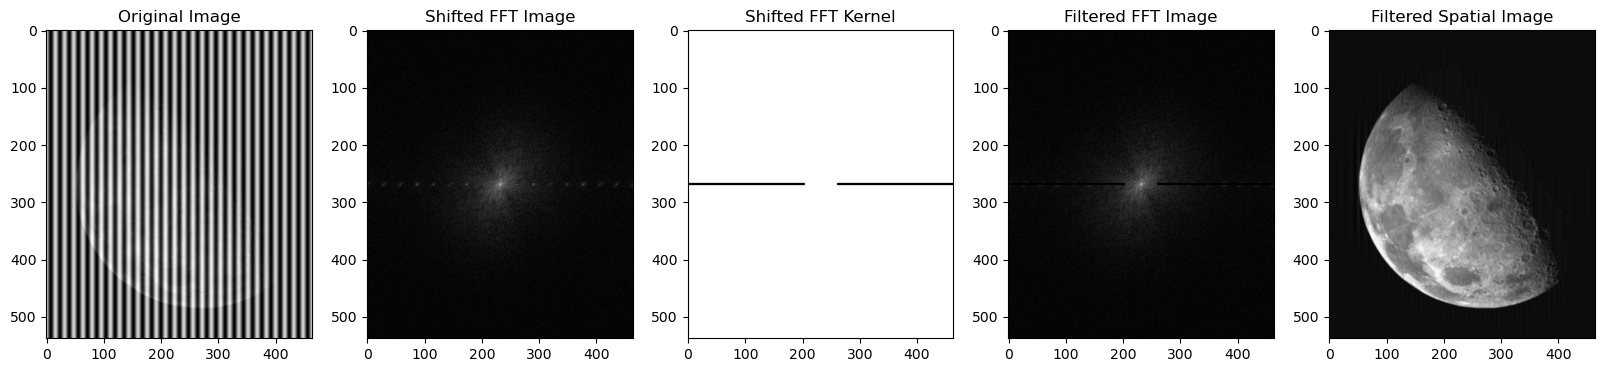

In [2]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)  
    # Compute the fft of the image and center the fft spectrum
    fft_image = np.fft.fftshift(np.fft.fft2(im))

    # Define the required kernel in frequency domain
    fft_kernel = np.ones(fft_image.shape)
    h0 = 5 # Spike height
    x0, y0  = fft_image.shape[1] // 2, fft_image.shape[0] // 2 # Frequency spectrum origin/center
    max_center_freq = 28 # Width of the frequencies to keep (i.e., keep all frequencies to 28)

    fft_kernel[(y0 - h0 // 2):(y0 + h0 // 2)] = 0
    fft_kernel[(y0 - h0 // 2):(y0 + h0 // 2), (x0 - max_center_freq):(x0 + max_center_freq)] = 1

    # Filter the image in frequency domain
    fft_filtered_image = fft_image * fft_kernel

    # Obtain the processed image in spatial domain
    im_filtered = np.fft.ifft2(np.fft.ifftshift(fft_filtered_image)).real

    # Compute the log of the magnitude of fft spectrums for visualizations
    fft_kernel = np.abs(fft_kernel)
    fft_image_log_abs = np.log(1 + np.abs(fft_image))
    fft_im_filtered = np.log(1 + np.abs(fft_filtered_image))

    # Normalize the intenisty values of the filtered image from an intensity range of -x and +y to 0 and 1
    im_filtered = (im_filtered - np.min(im_filtered))/(np.max(im_filtered)-np.min(im_filtered))

    # Visualization
    plt.figure(figsize=(20, 4))
    # plt.subplot(num_rows, num_cols, position (1-indexed))
    plt.subplot(1, 5, 1)
    plt.imshow(im, cmap="gray")
    plt.title('Original Image')

    # Visualize FFT
    plt.subplot(1, 5, 2) 
    plt.imshow(fft_image_log_abs, cmap="gray")
    plt.title("Shifted FFT Image")

    # Visualize FFT kernel
    plt.subplot(1, 5, 3)
    plt.imshow(fft_kernel, cmap="gray")
    plt.title("Shifted FFT Kernel")

    # Visualize filtered FFT image
    plt.subplot(1, 5, 4)
    plt.imshow(fft_im_filtered, cmap="gray")
    plt.title("Filtered FFT Image")

    # Visualize filtered spatial image
    plt.subplot(1, 5, 5) 
    plt.imshow(im_filtered, cmap="gray")
    plt.title("Filtered Spatial Image")

    plt.savefig(utils.image_output_dir.joinpath("task_4c.png"))
    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))